Apsidal Motion
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In order for apsidal motion to be apparent, we need an eccentric system that is precessing.

In [3]:
b['ecc'] = 0.2

Let's set a very noticeable rate of precession.

In [4]:
b['dperdt'] = 2.0 * u.deg/u.d

We'll add [lc](./LC.ipynb), [orb](./ORB.ipynb), and [etv](./ETV.ipynb) datasets to see how the apsidal motion affects each.  We'll need to sample over several orbits of the binary (which has a period of 3 days, by default).

In [5]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')
b.add_dataset('lc', times=np.linspace(4,5,101), dataset='lc02')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [6]:
b.add_dataset('orb', times=np.linspace(0,5,401), dataset='orb01')

<ParameterSet: 3 parameters | contexts: compute, dataset>

In [7]:
b.run_compute(irrad_method='none')

<ParameterSet: 18 parameters | kinds: orb, lc>

Influence on Orbits (positions)
-----------------

Let's plot the orbit from above and highlight the positions of each star at each cycle (times that are multiples of the period).

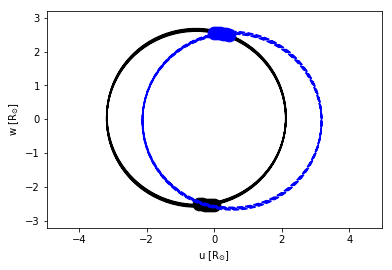

In [8]:
afig, mplfig = b['orb01@model'].plot(y='ws', time=[0,1,2,3,4,5], show=True)

Influence on Light Curves (fluxes)
-------------------

Now looking at the light curve, we can see that this is resulting in the eclipses moving in phase-space.

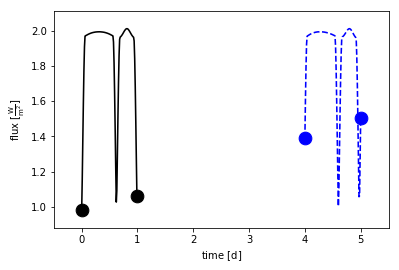

In [11]:
afig, mplfig = b['lc01@model'].plot()
afig, mplfig = b['lc02@model'].plot(time=[0,1,4,5], show=True) 

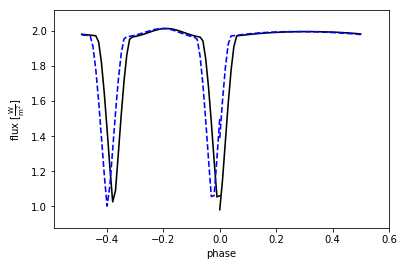

In [10]:
afig, mplfig = b['lc01@model'].plot(x='phases')
afig, mplfig = b['lc02@model'].plot(x='phases', show=True)